In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape

(5110, 12)

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
np.round((df.isnull().sum()/df.shape[0])*100,2)

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

In [10]:
df.drop(columns=['id'],inplace=True)
df.shape

(5110, 11)

In [11]:
mean_bmi = np.mean(df['bmi'])
df.fillna(mean_bmi,inplace=True)

In [12]:
bins = [0.0,18.50,24.90,29.90,34.90,97.61]
labels = ['Underweight','Normal','Overweight','Obese','Extremely Obese']
df['bmi_gr'] = pd.cut(df.bmi,bins=bins,labels=labels,right=False)

In [13]:
health_status = []

for i in range(len(df)):
    if (df['hypertension'][i] == 1) and (df['heart_disease'][i] == 1):
        health_status.append('ht+hd')
    elif df['hypertension'][i] == 1:
        health_status.append('ht only')
    elif df['heart_disease'][i] == 1:
        health_status.append('hd_only')
    else:
        health_status.append('No disease')

In [14]:
df['health_status'] = health_status

In [15]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
bmi_gr                  5
health_status           4
dtype: int64

#### Univariate Analysis

##### gender

In [17]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [18]:
df[df.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_gr,health_status
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,Normal,No disease


In [19]:
df['gender'][df.gender == 'Other'] = 'Male'

In [20]:
df.gender.value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

##### age

In [21]:
df.age.min()

0.08

In [22]:
df[df.work_type == 'children']['age'].max()

16.0

In [23]:
df.age.max()

82.0

In [24]:
len(df[df.age >60])

1304

In [25]:
bins = [0,16.1,35.1,60.1,82.1]
labels = ['Children','Young Adult','Mature Adult','Old']
df['age_gr'] = pd.cut(df['age'],bins=bins,labels=labels,right=False)

In [26]:
df.age_gr.value_counts()

Mature Adult    1907
Old             1304
Young Adult     1103
Children         796
Name: age_gr, dtype: int64

##### hypertension

In [27]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

##### heart_disease

In [28]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

##### marital status

In [29]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

##### work type

In [30]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [31]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [32]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

##### resident type

In [33]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

##### bmi_gr

In [34]:
df.bmi_gr.value_counts()

Overweight         1611
Normal             1216
Obese              1015
Extremely Obese     931
Underweight         337
Name: bmi_gr, dtype: int64

#### Bivariate Analysis

In [35]:
stroke_by_gender = df.groupby(['gender'])['stroke'].sum().reset_index()
stroke_by_gender

,gender,stroke
0,Female,141
1,Male,108


In [36]:
stroke_by_age_group = df.groupby(['age_gr'])['stroke'].sum().reset_index()
stroke_by_age_group

,age_gr,stroke
0,Children,2
1,Young Adult,1
2,Mature Adult,69
3,Old,177


In [37]:
stroke_by_occupation = df.groupby(['work_type'])['stroke'].sum().reset_index()
stroke_by_occupation

,work_type,stroke
0,Govt_job,33
1,Never_worked,0
2,Private,149
3,Self-employed,65
4,children,2


In [38]:
stroke_by_smoking_by_gender = df.groupby(['smoking_status','gender'])['stroke'].sum().reset_index()
stroke_by_smoking_by_gender

,smoking_status,gender,stroke
0,Unknown,Female,25
1,Unknown,Male,22
2,formerly smoked,Female,34
3,formerly smoked,Male,36
4,never smoked,Female,63
5,never smoked,Male,27
6,smokes,Female,19
7,smokes,Male,23


In [39]:
stroke_by_gender_and_residence = df.groupby(['Residence_type','gender'])['stroke'].sum().reset_index()
stroke_by_gender_and_residence

,Residence_type,gender,stroke
0,Rural,Female,64
1,Rural,Male,50
2,Urban,Female,77
3,Urban,Male,58


In [40]:
stroke_by_health_status = df.groupby('health_status')['stroke'].sum().reset_index()
stroke_by_health_status

,health_status,stroke
0,No disease,149
1,hd_only,34
2,ht only,53
3,ht+hd,13


In [41]:
stroke_by_bmi_gr = df.groupby('bmi_gr')['stroke'].sum().reset_index()
stroke_by_bmi_gr

,bmi_gr,stroke
0,Underweight,1
1,Normal,35
2,Overweight,112
3,Obese,58
4,Extremely Obese,43


### Visualization

<AxesSubplot:>

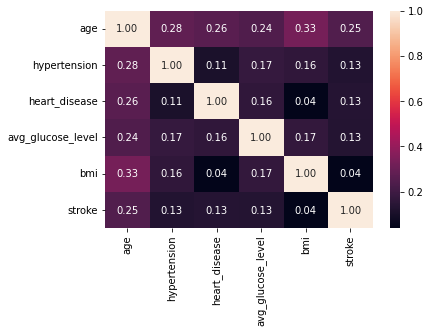

In [42]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt=".2f")

<AxesSubplot:xlabel='age', ylabel='Count'>

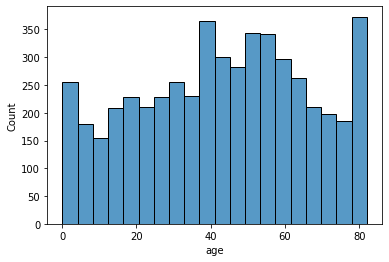

In [43]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='age_gr', ylabel='count'>

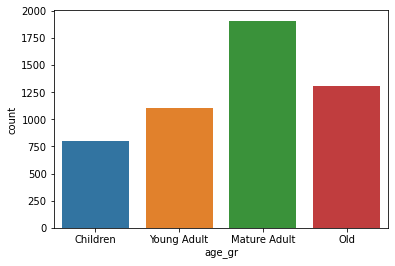

In [44]:
sns.countplot(df['age_gr'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

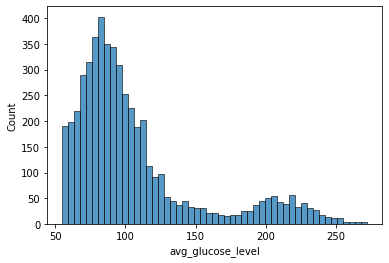

In [45]:
sns.histplot(df['avg_glucose_level'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

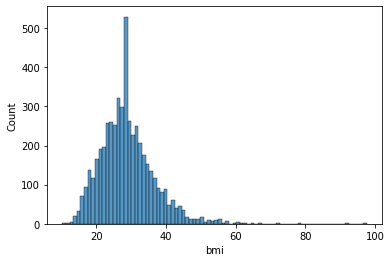

In [46]:
sns.histplot(df['bmi'])

<AxesSubplot:xlabel='stroke', ylabel='count'>

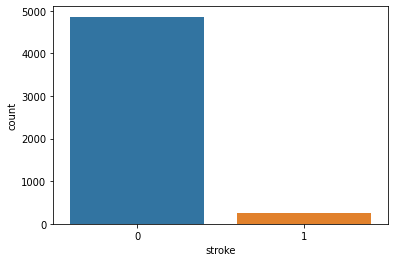

In [47]:
sns.countplot(df['stroke'])

Text(0.5, 1.0, 'stroke by gender')

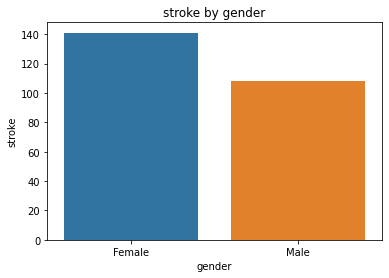

In [48]:
sns.barplot(x='gender',y='stroke',data=stroke_by_gender)
plt.title('stroke by gender')

<AxesSubplot:xlabel='age_gr', ylabel='stroke'>

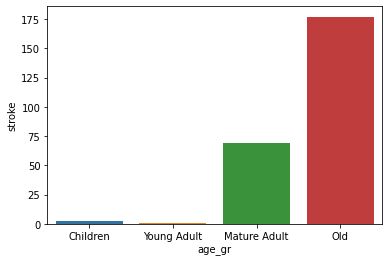

In [49]:
sns.barplot(x='age_gr',y='stroke',data=stroke_by_age_group)

Text(0.5, 1.0, 'stroke by work type')

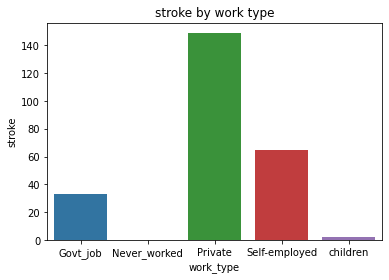

In [50]:
sns.barplot(x='work_type',y='stroke',data=stroke_by_occupation)
plt.title('stroke by work type')

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

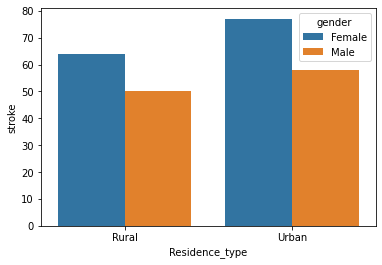

In [51]:
sns.barplot(x='Residence_type',y='stroke',data=stroke_by_gender_and_residence,hue='gender')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'formerly smoked'),
  Text(2, 0, 'never smoked'),
  Text(3, 0, 'smokes')])

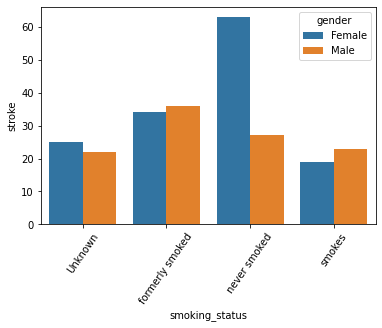

In [52]:
sns.barplot(x='smoking_status',y='stroke',data = stroke_by_smoking_by_gender,hue='gender')
plt.xticks(rotation=55)

In [53]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_gr,health_status,age_gr
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Extremely Obese,hd_only,Old
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,No disease,Old
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obese,hd_only,Old
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obese,No disease,Mature Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Normal,ht only,Old


In [54]:
str_only = df[df.stroke == 1]
no_str_only = df[df.stroke == 0]

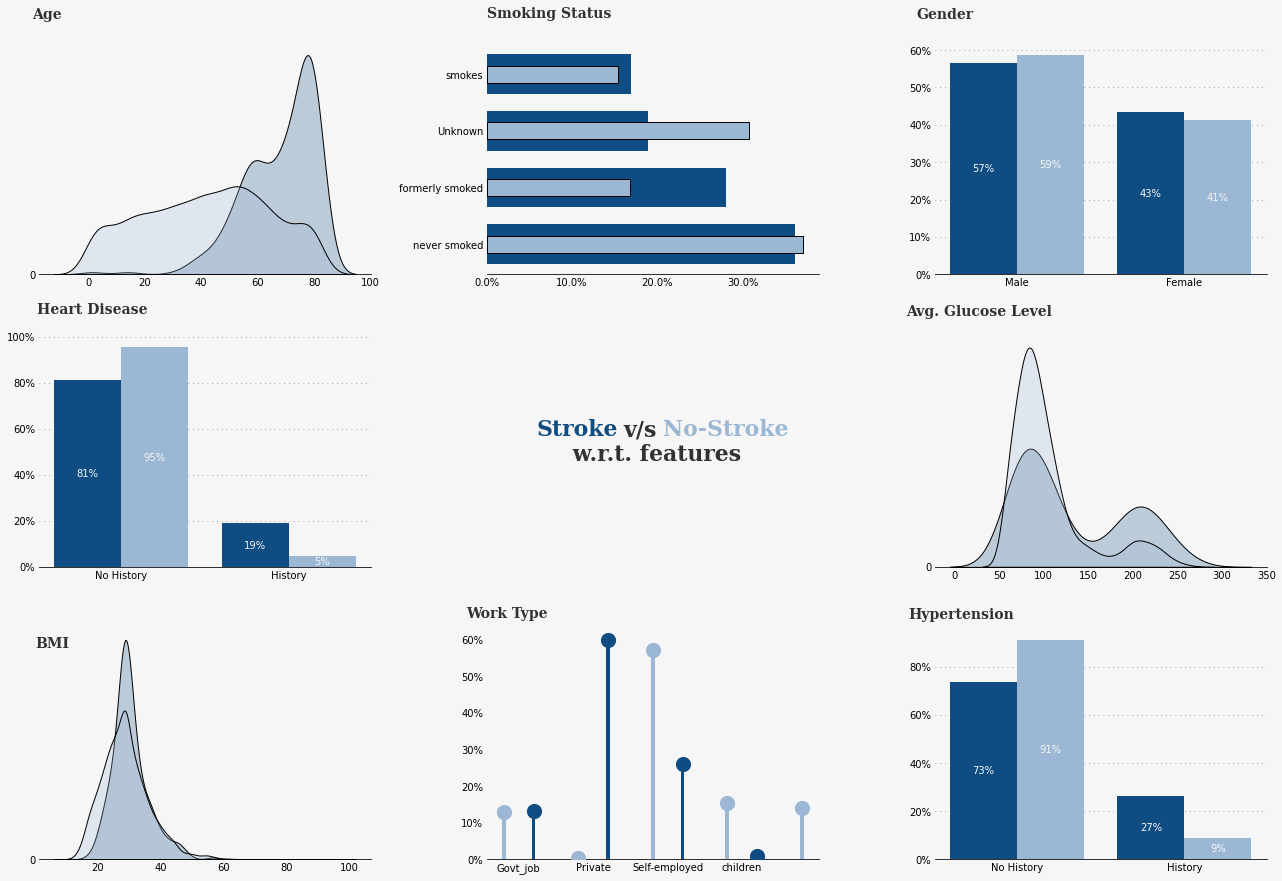

In [61]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color


# Plots

## Age


ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["age"])
negative = pd.DataFrame(no_str_only["age"])
sns.kdeplot(positive["age"], ax=ax0,color="#0f4c81", shade=True, ec='black',label="positive")
sns.kdeplot(negative["age"], ax=ax0, color="#9bb7d4", shade=True, ec='black',label="negative")
#ax3.text(0.29, 13, 'Age', 
 #        fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# Smoking
positive = pd.DataFrame(str_only["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_str_only["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color="#0f4c81", zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color="#9bb7d4", zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
# Ax2 - GENDER 
positive = pd.DataFrame(str_only["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_str_only["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    

# Heart Dis

positive = pd.DataFrame(str_only["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_str_only["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, '\n\n w.r.t. features', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(0.15,0.57,"Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#0f4c81')
ax4.text(0.41,0.57,"v/s", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.53,0.57,"No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#9bb7d4')


# Glucose

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["avg_glucose_level"])
negative = pd.DataFrame(no_str_only["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5,color="#0f4c81",ec='black', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color="#9bb7d4", ec='black',shade=True, label="negative")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')



## BMI


ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["bmi"])
negative = pd.DataFrame(no_str_only["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6,color="#0f4c81", ec='black',shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax6, color="#9bb7d4",ec='black', shade=True, label="negative")
ax6.text(-0.06, 0.09, 'BMI', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')


# Work Type

positive = pd.DataFrame(str_only["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index),rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# hypertension

positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# tidy up



for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,9):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 

        
plt.show()

In [ ]:
df.to_csv('stroke_data_cleaned.csv')